In [1]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds
plt.rc(group = 'figure', figsize = (4, 4))

In [2]:
os.getcwd()

'C:\\Users\\fins\\Documents\\project\\code'

In [ ]:
os.chdir('../../data')

In [4]:
sorted(os.listdir())

['APT_Data_Prep.csv',
 'APT_Detail_Seoul_2024.csv',
 'APT_Detail_Seoul_2024.xlsx',
 'APT_Price.csv',
 'APT_Price.pkl',
 'APT_Price.xlsx',
 'APT_Price_Seoul_Merged_2020~2024.csv',
 'APT_Price_Seoul_Merged_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2020.csv',
 'APT_Price_Seoul_Split_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2021.csv',
 'APT_Price_Seoul_Split_2022.csv',
 'APT_Price_Seoul_Split_2023.csv',
 'APT_Price_Seoul_Split_2024.csv',
 'Cereal.pkl',
 'Diabetes.pkl',
 'Marine_Product.csv',
 'Marine_Product.pkl',
 'Marine_Product.xlsx',
 'NA_Sample.xlsx',
 'Pivot_Table_Marine.xlsx',
 'Pivot_table_APT.xlsx',
 'Used_Cars.csv',
 'Used_Cars.pkl',
 'Used_Cars.xlsx',
 'Used_Cars_Prep.pkl',
 'WhiteWine.pkl',
 'dtc_full.png',
 'dtr_full.png',
 'test.png']

In [5]:
objs = pd.read_pickle('WhiteWine.pkl')

In [6]:
globals().update(objs)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
model = GradientBoostingClassifier(subsample = 0.8, random_state = 0)

In [9]:
model.fit(X = X_tr, y = y_tr)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",0.8
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [10]:
model.score(X = X_tr, y = y_tr)

0.8780630105017503

In [11]:
model.score(X = X_vl, y = y_vl)

0.8258503401360544

In [12]:
pd.Series(data = model.feature_importances_, 
          index = model.feature_names_in_) \
  .sort_values(ascending = False)

alcohol                0.426315
volatile acidity       0.106041
pH                     0.073835
free sulfur dioxide    0.070229
density                0.062731
chlorides              0.058014
sulphates              0.057779
residual sugar         0.054972
fixed acidity          0.048334
citric acid            0.041750
dtype: float64

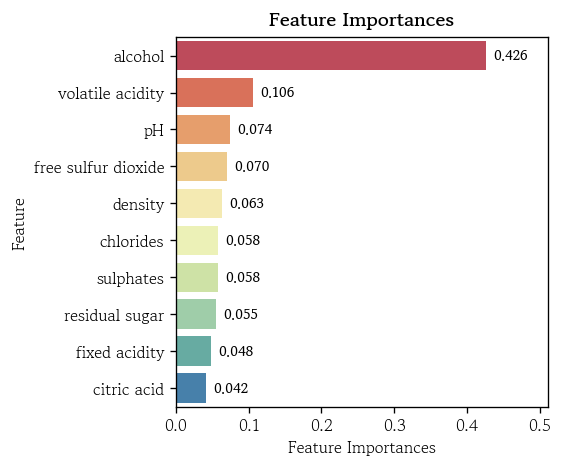

In [13]:
hds.plot.feature_importance(model)

In [14]:
model.n_estimators_

100

In [15]:
model.oob_scores_

array([1.02805243, 1.01724286, 0.95554554, 0.88160882, 0.9720897 ,
       0.91422108, 0.86311853, 0.85109606, 0.82919309, 0.80335377,
       0.85085797, 0.7586204 , 0.86276952, 0.80837317, 0.80936706,
       0.68069513, 0.78126849, 0.7787    , 0.75561803, 0.74904498,
       0.80420522, 0.76128648, 0.68356294, 0.74917672, 0.73799979,
       0.70798096, 0.73746803, 0.75738485, 0.76444183, 0.69297664,
       0.75483   , 0.71065746, 0.72681656, 0.74696793, 0.7243886 ,
       0.75448045, 0.66592986, 0.70589232, 0.69695738, 0.69582086,
       0.74933651, 0.6476949 , 0.64104666, 0.67805615, 0.70269674,
       0.64379232, 0.60084801, 0.69252377, 0.61069659, 0.64976184,
       0.68127881, 0.68545021, 0.67795447, 0.67491625, 0.64650565,
       0.60791936, 0.63473182, 0.63152285, 0.6975338 , 0.64452196,
       0.64443871, 0.66343598, 0.64880312, 0.62198121, 0.67703031,
       0.64391933, 0.61231886, 0.66074893, 0.60720582, 0.6303034 ,
       0.63363701, 0.64727678, 0.62210168, 0.60796243, 0.59547

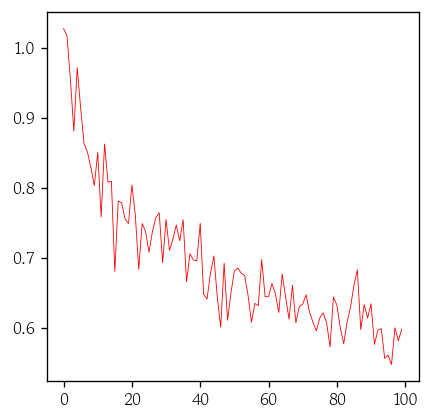

In [16]:
sns.lineplot(x = range(model.n_estimators_), 
             y = model.oob_scores_, 
             color = 'red', 
             linewidth = 0.5);

In [17]:
y_pred = model.predict(X = X_vl)

In [18]:
hds.stat.clfmetrics(y_true = y_vl, y_pred = y_pred)

In [19]:
y_prob = model.predict_proba(X = X_vl)

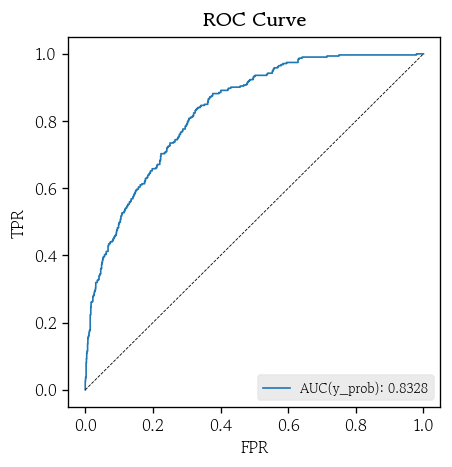

In [20]:
hds.plot.roc_curve(y_true = y_vl, y_prob = y_prob)

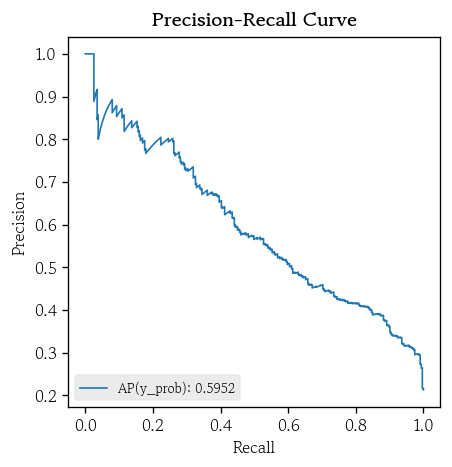

In [21]:
hds.plot.pr_curve(y_true = y_vl, y_prob = y_prob)

In [22]:
model = GradientBoostingClassifier(n_estimators = 3000,
                                   subsample = 0.8, 
                                   random_state = 0)

In [23]:
model.fit(X = X_tr, y = y_tr)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",3000
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",0.8
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``,

In [24]:
model.score(X = X_tr, y = y_tr)

1.0

In [25]:
model.score(X = X_vl, y = y_vl)

0.8687074829931973

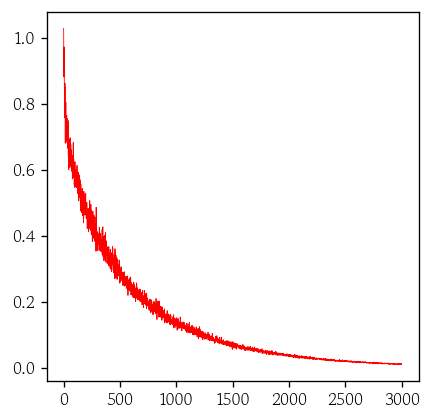

In [26]:
sns.lineplot(x = range(model.n_estimators_), 
             y = model.oob_scores_, 
             color = 'red',
             linewidth = 0.5);

In [27]:
y_pred = model.predict(X = X_vl)

In [28]:
hds.stat.clfmetrics(y_true = y_vl, y_pred = y_pred)

In [29]:
y_prob = model.predict_proba(X = X_vl)

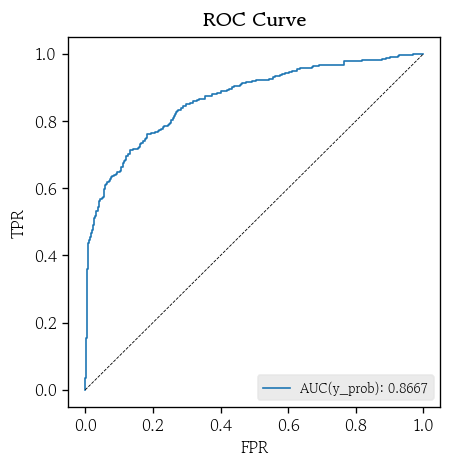

In [30]:
hds.plot.roc_curve(y_true = y_vl, y_prob = y_prob)

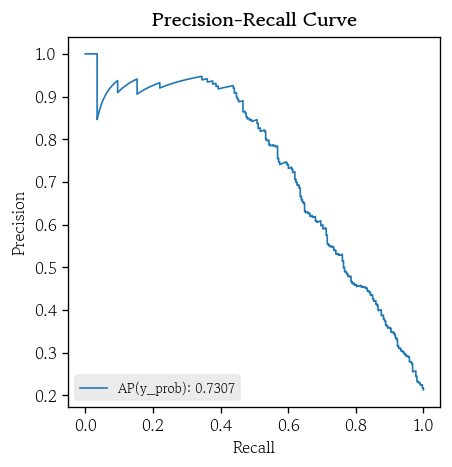

In [31]:
hds.plot.pr_curve(y_true = y_vl, y_prob = y_prob)

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(k_neighbors = 5, random_state = 0)

In [34]:
X_bal, y_bal = smote.fit_resample(X = X_tr, y = y_tr)

In [35]:
model_bal = GradientBoostingClassifier(n_estimators = 3000, 
                                       subsample = 0.8, 
                                       random_state = 0)

In [36]:
model_bal.fit(X = X_bal, y = y_bal)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",3000
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",0.8
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``,

In [37]:
model_bal.score(X = X_bal, y = y_bal)

1.0

In [38]:
model_bal.score(X = X_vl, y = y_vl)

0.8578231292517007

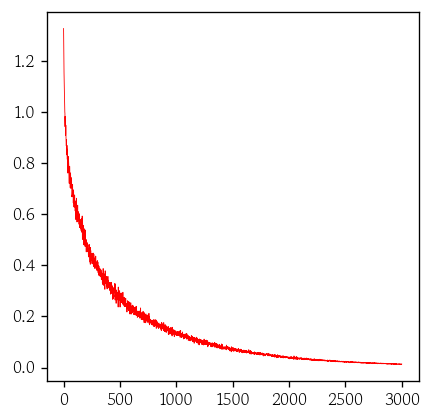

In [39]:
sns.lineplot(x = range(model_bal.n_estimators_), 
             y = model_bal.oob_scores_, 
             color = 'red', 
             linewidth = 0.5);

In [40]:
y_pred_bal = model_bal.predict(X = X_vl)

In [41]:
hds.stat.clfmetrics(y_true = y_vl, y_pred = y_pred_bal)

In [42]:
hds.stat.clfmetrics(y_true = y_vl, y_pred = y_pred)

In [43]:
y_prob_bal = model_bal.predict_proba(X = X_vl)

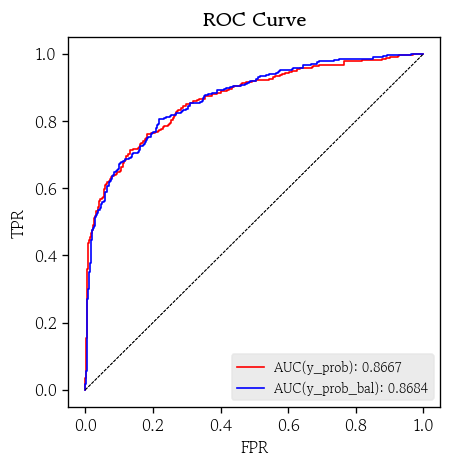

In [44]:
hds.plot.roc_curve(y_true = y_vl, y_prob = y_prob, color = 'red')
hds.plot.roc_curve(y_true = y_vl, y_prob = y_prob_bal, color = 'blue')

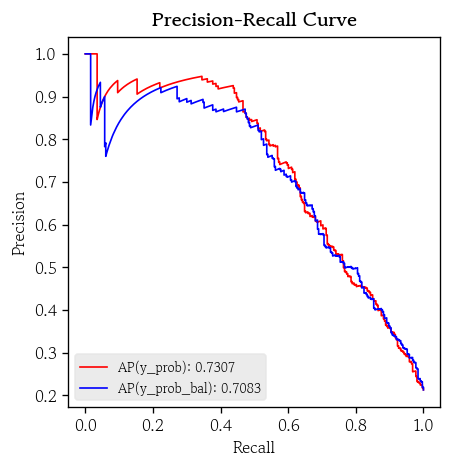

In [45]:
hds.plot.pr_curve(y_true = y_vl, y_prob = y_prob, color = 'red')
hds.plot.pr_curve(y_true = y_vl, y_prob = y_prob_bal, color = 'blue')